In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score


In [3]:

train = pd.read_csv(r"C:\Users\Saeed Ahmad\Desktop\PIA taks\task2\task2\Updated_train.csv")  
test = pd.read_csv(r"C:\Users\Saeed Ahmad\Desktop\PIA taks\task2\task2\Updated_Test.csv")    
submission = pd.read_csv("sample_submission.csv")  

In [4]:

X = train.drop(columns=["Transported"])  
y = train["Transported"]


In [22]:
if y.dtype == "object":
    y = y.map({"Yes": 1, "No": 0})

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X) 
X_test_scaled = scaler.transform(test)  

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y)  

RandomForestClassifier(random_state=42)

In [25]:
y_train_pred = model.predict(X_train_scaled)
accuracy = accuracy_score(y, y_train_pred)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 99.99%


In [26]:

test_predictions = model.predict(X_test_scaled)
submission["Transported"] = ["Yes" if pred == 1 else "No" for pred in test_predictions]


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
d:\anaconda\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


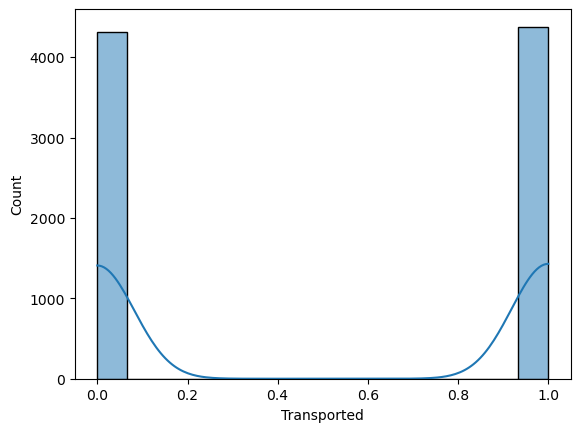

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y, kde=True)
plt.show()
